In [11]:
import sys
print(sys.version)
import numpy as np
import ROOT
from array import *
import matplotlib.pyplot as plt
import math
from matplotlib import colors
import time

3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]


In [12]:
fAtm = ROOT.TFile.Open('/home/leoperes/GammaAxion_0.1_0.2GeV_51452090_29_20231231T010656Z_ntuple.root')

In [13]:
fTree_atm = fAtm.Get("ana/Atm")
fTree_atm_All = fAtm.Get("ana/AllEvents")

In [14]:
def GetNpArraysFromTrees(tree, branch_name):
    estimate = 3e6 #amount of numbers getting from branch
    tree.SetEstimate(int(estimate))
    result_hist = tree.Draw(branch_name, "", "goff")
    result = np.asarray(np.frombuffer(tree.GetV1(), dtype=np.float64, count=result_hist))
    result = result.copy()
    return result
def GetNpArraysFromTrees2(tree, branch_name):
    estimate = 3e6 #amount of numbers getting from branch
    tree.SetEstimate(int(estimate))
    result_hist = tree.Draw(branch_name, "", "goff")
    result = np.asarray(np.frombuffer(tree.GetV1(), count=result_hist))
    result = result.copy()
    return result

In [15]:
nSimulatedEvtsReco_atm = fTree_atm.GetEntries()
nSimulatedEvtsAll_atm = fTree_atm_All.GetEntries()

In [16]:
RecoVertex = GetNpArraysFromTrees2(fTree_atm,"PrimaryRecoVertex")

In [17]:
RecoVertex_normal = np.reshape(RecoVertex, (nSimulatedEvtsReco_atm,3))

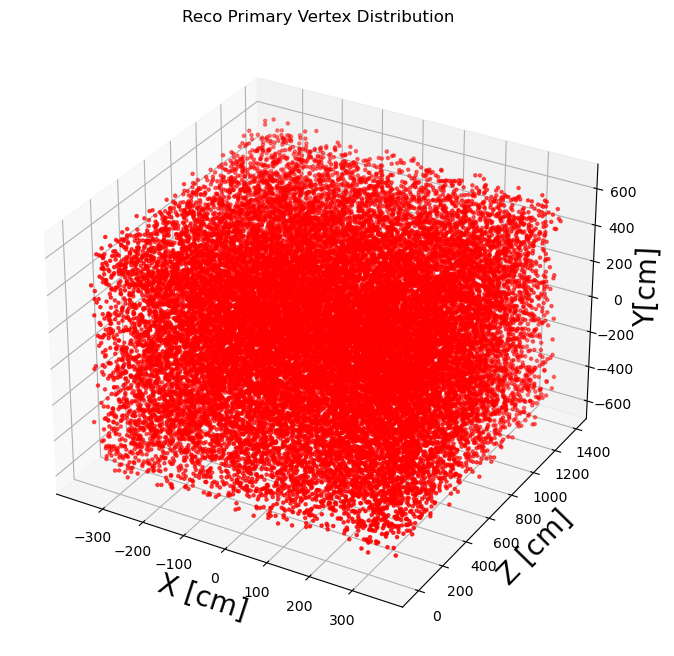

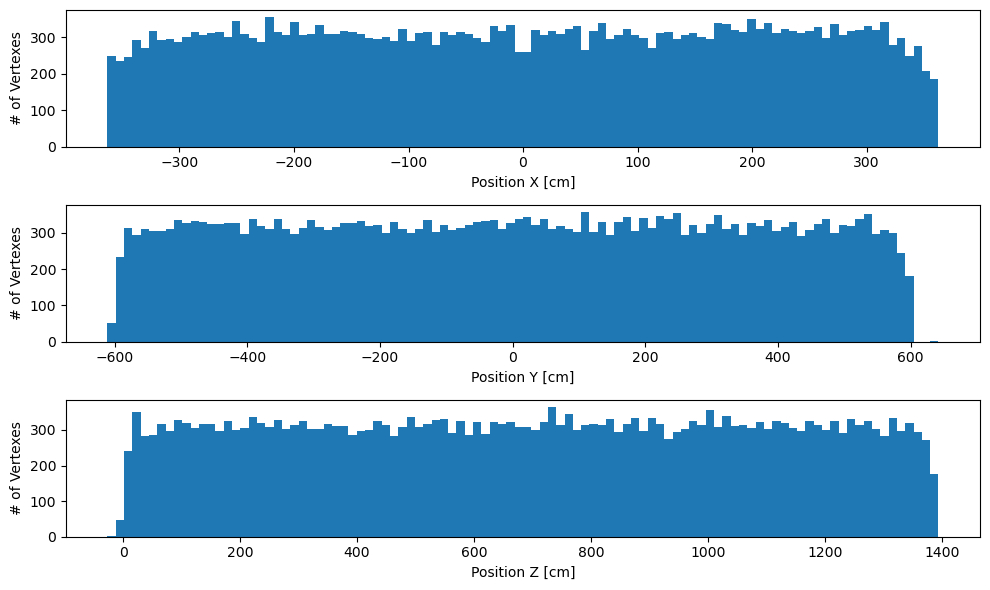

In [18]:
fig = plt.figure(figsize=(12,8))
ax = plt.axes(projection='3d')
ax.scatter3D(RecoVertex_normal[:,0],  RecoVertex_normal[:,2], RecoVertex_normal[:,1], c='r', marker = '.')

ax.set_xlabel('X [cm]', fontsize=20)
ax.set_ylabel('Z [cm]', fontsize=20)
ax.set_zlabel('Y[cm]', fontsize=20)
ax.set_title('Reco Primary Vertex Distribution')


fig, ax = plt.subplots(3, figsize=(10, 6))

ax[0].hist(RecoVertex_normal[:,0], bins = 100)
ax[0].set_xlabel("Position X [cm]")
ax[0].set_ylabel("# of Vertexes")

ax[1].hist(RecoVertex_normal[:,1], bins = 100)
ax[1].set_xlabel("Position Y [cm]")
ax[1].set_ylabel("# of Vertexes")

ax[2].hist(RecoVertex_normal[:,2], bins = 100)
ax[2].set_xlabel("Position Z [cm]")
ax[2].set_ylabel("# of Vertexes")

fig.tight_layout()

In [19]:
TrueVertex = GetNpArraysFromTrees2(fTree_atm_All,"MCInitialPositionGamma") 
TrueVertex_normal = np.reshape(TrueVertex, (nSimulatedEvtsAll_atm,3))

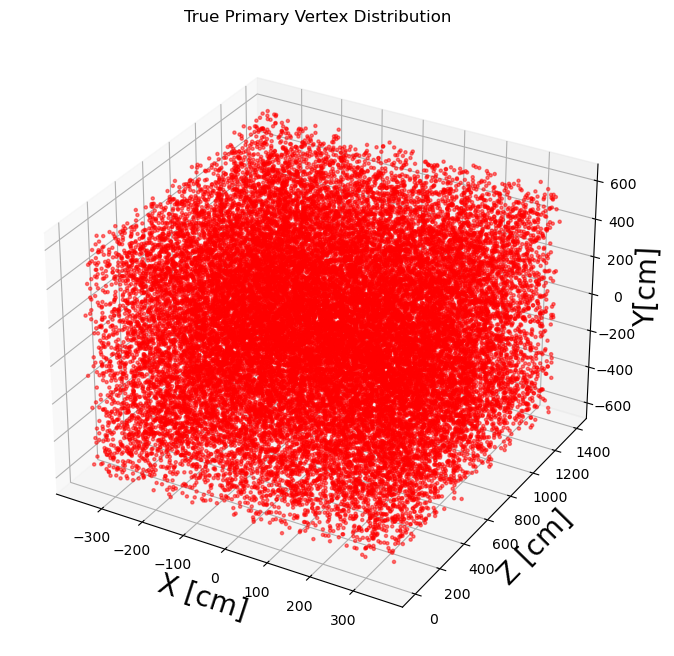

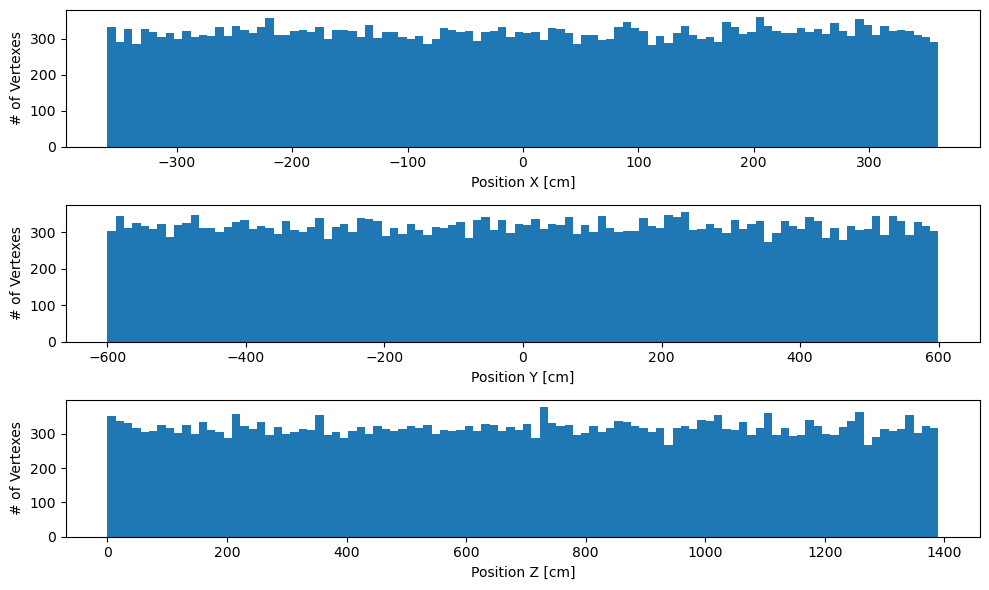

In [40]:
fig = plt.figure(figsize=(12,8))
ax = plt.axes(projection='3d')
ax.scatter3D(TrueVertex_normal[:,0],  TrueVertex_normal[:,2], TrueVertex_normal[:,1], c='r', marker = '.', alpha = 0.5)

ax.set_xlabel('X [cm]', fontsize=20)
ax.set_ylabel('Z [cm]', fontsize=20)
ax.set_zlabel('Y[cm]', fontsize=20)
ax.set_title('True Primary Vertex Distribution')

plt.savefig('alp_true_vertex_3d'+str(time.strftime("%Y%m%d"))+'.pdf', format='pdf')

fig, ax = plt.subplots(3, figsize=(10, 6))

ax[0].hist(TrueVertex_normal[:,0], bins = 100)
ax[0].set_xlabel("Position X [cm]")
ax[0].set_ylabel("# of Vertexes")

ax[1].hist(TrueVertex_normal[:,1], bins = 100)
ax[1].set_xlabel("Position Y [cm]")
ax[1].set_ylabel("# of Vertexes")

ax[2].hist(TrueVertex_normal[:,2], bins = 100)
ax[2].set_xlabel("Position Z [cm]")
ax[2].set_ylabel("# of Vertexes")

plt.savefig('alp_true_vertex'+str(time.strftime("%Y%m%d"))+'.pdf', format='pdf')

fig.tight_layout()



In [21]:
nSimulatedEvtsReco_atm

30499

In [22]:
nSimulatedEvtsAll_atm

31638

In [23]:
GammaE = GetNpArraysFromTrees(fTree_atm,"MCGammaE")

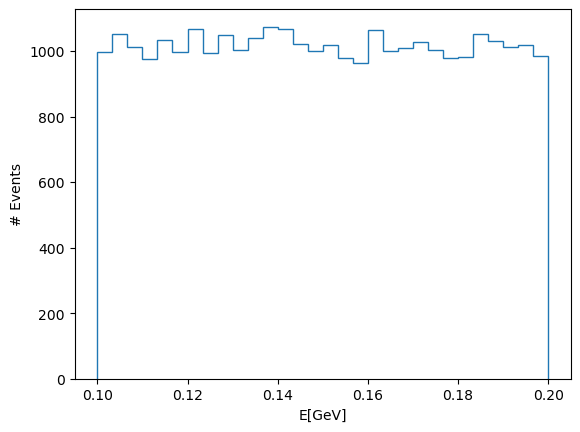

In [24]:
plt.figure(dpi=100)
plt.hist(GammaE, bins =30, histtype='step')
plt.xlabel('E[GeV]')
plt.ylabel('# Events')
plt.show()

In [25]:
DiffCosAngleTotalMom = GetNpArraysFromTrees(fTree_atm,"DiffCosAngleTotalMom")
CVN_NCScore = GetNpArraysFromTrees(fTree_atm,"CVN_NCScore")
nSpacePoints = GetNpArraysFromTrees(fTree_atm,"nSpacePoints")
LongestShower = GetNpArraysFromTrees(fTree_atm,"LongestShower")
NHits = GetNpArraysFromTrees(fTree_atm,"NHits")

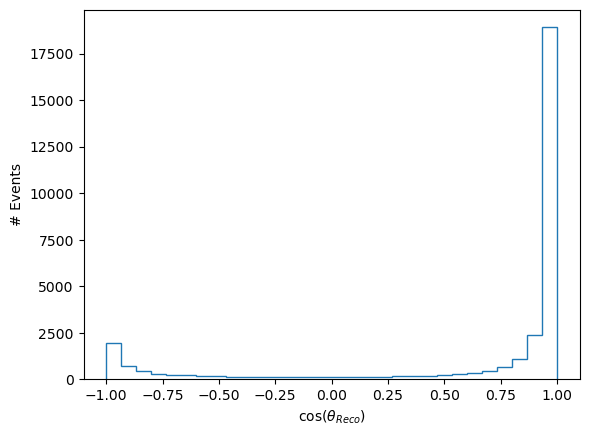

In [26]:
plt.figure(dpi=100)
plt.hist(DiffCosAngleTotalMom, bins =30, histtype='step')
plt.xlabel(r'cos($\theta_{Reco}$)')
plt.ylabel('# Events')
plt.show()

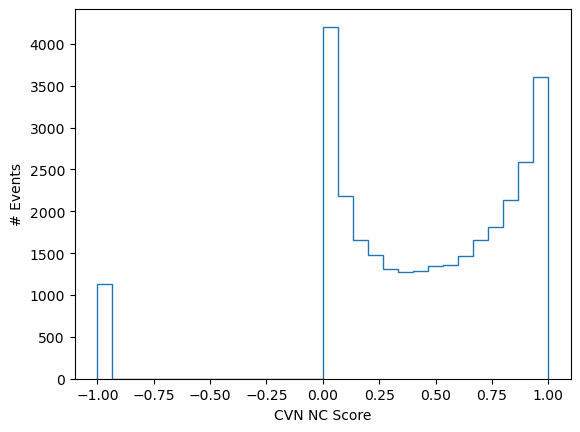

In [27]:
plt.figure(dpi=100)
plt.hist(CVN_NCScore, bins =30, histtype='step')
plt.xlabel('CVN NC Score')
plt.ylabel('# Events')
plt.show()

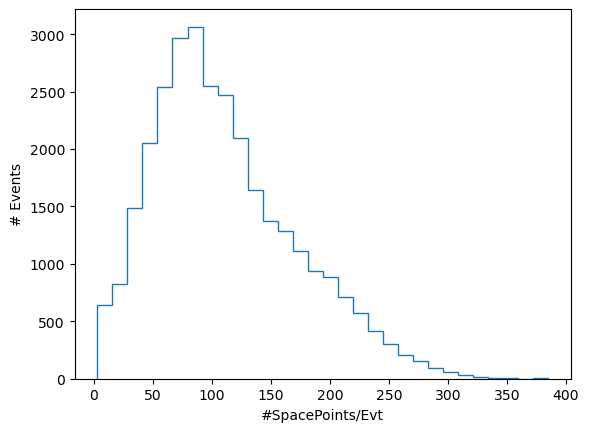

In [28]:
plt.figure(dpi=100)
plt.hist(nSpacePoints, bins =30, histtype='step')
plt.xlabel('#SpacePoints/Evt')
plt.ylabel('# Events')
plt.show()

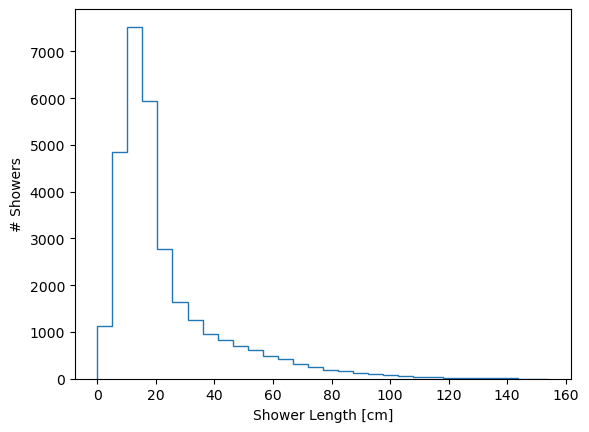

In [29]:
plt.figure(dpi=100)
plt.hist(LongestShower, bins =30, histtype='step')
plt.xlabel('Shower Length [cm]')
plt.ylabel('# Showers')
plt.show()

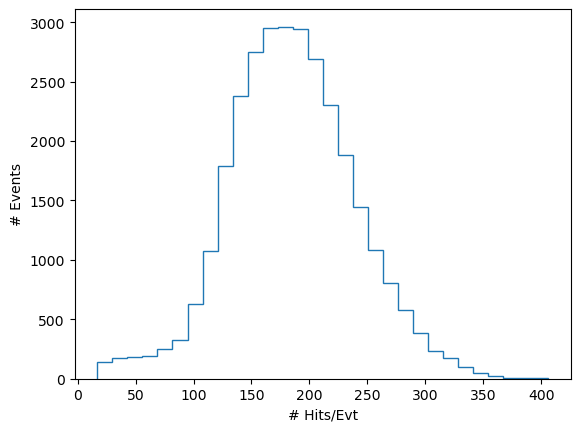

In [30]:
plt.figure(dpi=100)
plt.hist(NHits, bins =30, histtype='step')
plt.xlabel('# Hits/Evt')
plt.ylabel('# Events')
plt.show()

In [31]:
TotalMomRecoRangeUnitVect = GetNpArraysFromTrees2(fTree_atm,"TotalMomRecoRangeUnitVect")
Reco_mom = np.reshape(TotalMomRecoRangeUnitVect, (nSimulatedEvtsReco_atm,3))

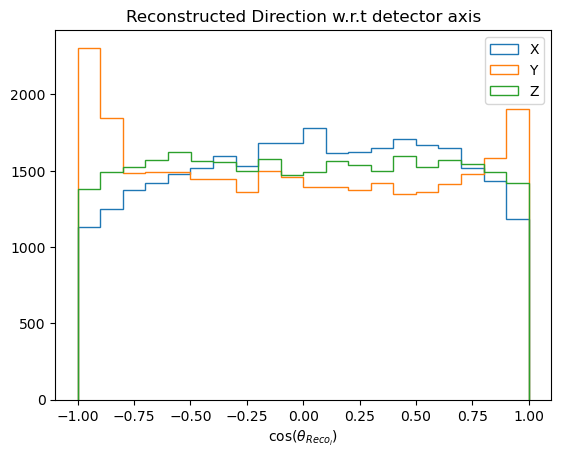

In [32]:
plt.figure(dpi=100)
plt.title('Reconstructed Direction w.r.t detector axis')
plt.hist(Reco_mom[:,0], bins = 20,  label ='X', histtype='step')
plt.hist(Reco_mom[:,1], bins = 20,  label ='Y', histtype='step')
plt.hist(Reco_mom[:,2], bins = 20,  label ='Z', histtype='step')
plt.xlabel(r'cos($\theta_{Reco_i})$')
#plt.hist(CosAngleTotalMom_mcs, bins = 20,  label ='MCS', histtype='step')
plt.legend()
plt.show()

In [33]:
MCPartGenMomentum = GetNpArraysFromTrees2(fTree_atm," MCGammaGenMomentum")
True_mom_In = np.reshape(MCPartGenMomentum, (nSimulatedEvtsReco_atm,4))

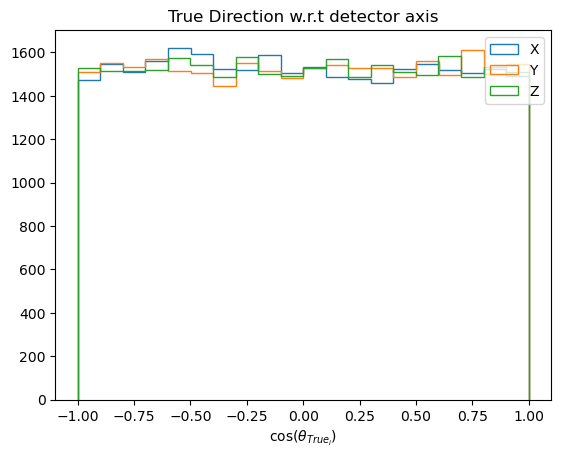

In [34]:
plt.figure(dpi=100)
plt.title('True Direction w.r.t detector axis')
plt.hist(True_mom_In[:,0]/True_mom_In[:,3], bins = 20,  label ='X', histtype='step')
plt.hist(True_mom_In[:,1]/True_mom_In[:,3], bins = 20,  label ='Y', histtype='step')
plt.hist(True_mom_In[:,2]/True_mom_In[:,3], bins = 20,  label ='Z', histtype='step')
plt.xlabel(r'cos($\theta_{True_i})$')
#plt.hist(CosAngleTotalMom_mcs, bins = 20,  label ='MCS', histtype='step')
plt.savefig('alp_direction_check_'+str(time.strftime("%Y%m%d"))+'.pdf', format='pdf')
plt.legend()
plt.show()

In [35]:
RecoEnergyGammaEvt = GetNpArraysFromTrees(fTree_atm,"EventRecoEnergy_Charge")


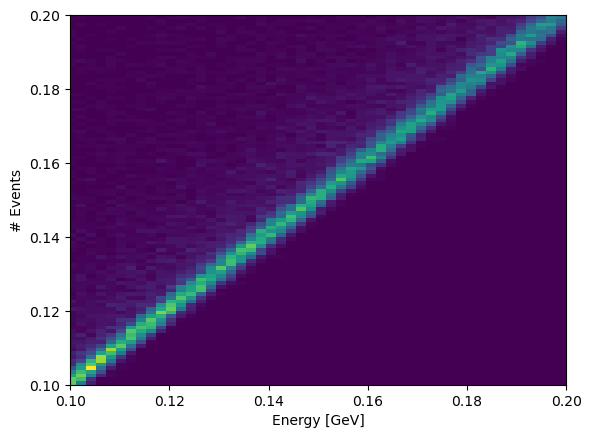

In [36]:
plt.figure(dpi=100)
plt.hist2d(RecoEnergyGammaEvt,GammaE, bins =100)
plt.xlim(0.1,0.2)
plt.ylim(0.1,0.2)


plt.xlabel('Energy [GeV]')
plt.ylabel('# Events')
plt.show()


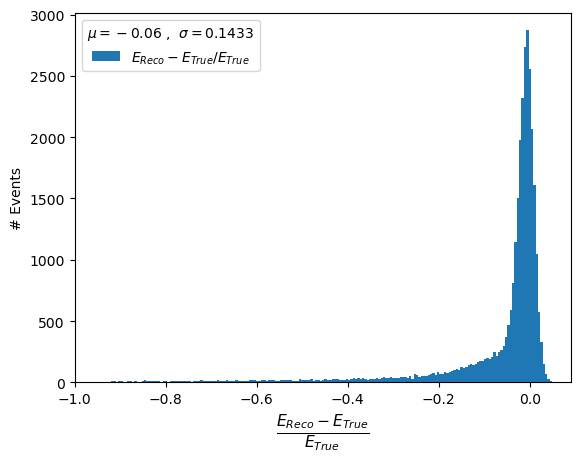

In [37]:
plt.figure(dpi=100)
plt.xlabel(r'$\frac{E_{Reco} - E_{True}}{ E_{True}}$', fontsize =16)
plt.ylabel('# Events')
#plt.title(r'Only CC-$\nu_{\mu}$ events at truth level w/ Reco Energy for CC-$\nu_{\mu}$')
plt.hist((RecoEnergyGammaEvt-GammaE)/GammaE, bins=200, label=r'$E_{Reco} - E_{True}/ E_{True}$')
plt.xlim(-1,0.09)
plt.legend(title=r'$\mu= %.5s$ , $~\sigma =$%.6s'%(((RecoEnergyGammaEvt-GammaE)/GammaE).mean(),((RecoEnergyGammaEvt-GammaE)/GammaE).std()))
plt.savefig('alp_energy_reco_'+str(time.strftime("%Y%m%d"))+'.pdf', format='pdf')
plt.show()

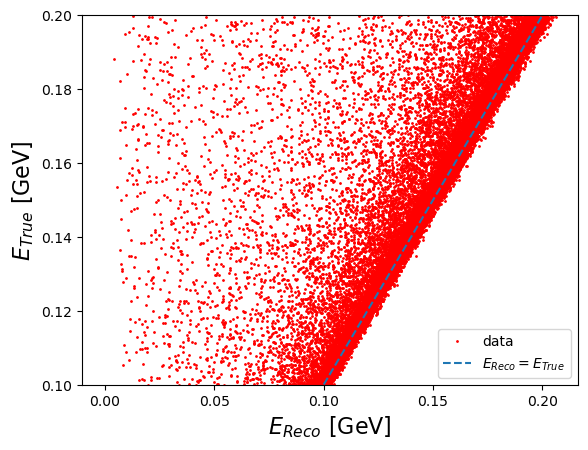

In [38]:
#ans1 = RecoEventsCCNuMu_ForTest[RecoEventsCCNuMu_ForTest<5]*(param[0]+param[1]*np.sqrt(RecoEventsCCNuMu_ForTest[RecoEventsCCNuMu_ForTest<5])+param[2]/np.sqrt(RecoEventsCCNuMu_ForTest[RecoEventsCCNuMu_ForTest<5]))

x = np.linspace(0,0.2,100)
plt.plot(RecoEnergyGammaEvt, GammaE, 'o', color ='red', label ="data", ms = 1)
#plt.plot(ans1, TrueEventsCCNuMu_ForTest, '*', color ='blue', label ="optimized data",ms=1)
plt.ylim(0.1,0.2)
plt.plot(x,x,'--', label=r'$E_{Reco}= E_{True}$ ')
plt.xlabel(r'$E_{Reco}$ [GeV]',  fontsize =16)
plt.ylabel(r'$E_{True}$ [GeV]', fontsize =16)
plt.legend()
plt.show()

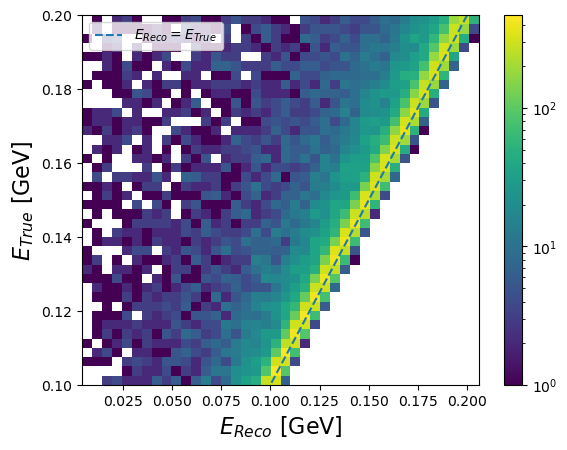

In [39]:
from matplotlib.colors import LogNorm
x = np.linspace(0,0.2,100)
plt.hist2d(RecoEnergyGammaEvt, GammaE,bins=40,norm=LogNorm())
#plt.plot(ans1, TrueEventsCCNuMu_ForTest, '*', color ='blue', label ="optimized data",ms=1)
plt.ylim(0.1,0.2)
plt.plot(x,x,'--', label=r'$E_{Reco}= E_{True}$ ')
plt.xlabel(r'$E_{Reco}$ [GeV]',  fontsize =16)
plt.ylabel(r'$E_{True}$ [GeV]', fontsize =16)
plt.colorbar() 
plt.legend()
plt.show()